In [3]:
from capstone import preprocess
import os

def print_directory_tree(root_dir, indent="", max_files=5):
    items = os.listdir(root_dir)
    total_items = len(items)
    
    if total_items > max_files:
        items = items[:max_files] + ['...']
    
    for index, item in enumerate(items):
        path = os.path.join(root_dir, item)

        if index == len(items) - 1:
            print(indent + "└── " + item)
            new_indent = indent + "    "
        else:
            print(indent + "├── " + item)
            new_indent = indent + "│   "
        
        if os.path.isdir(path) and item != '...':
            print_directory_tree(path, new_indent, max_files)

In [4]:
path = 'C:\\Users\\dlwns\\capstone\\147.속성기반 감정분석 데이터\\01-1.정식개방데이터\\Training\\02.라벨링데이터'

### 0. 폴더 생성
처음 Ai-Hub에서 데이터 다운받으시면 .zip 형태로 되어있어요 여러분들이랑 저랑 폴더 형식을 통일 시켜야 수정할 때 편하니까 아래 처럼 폴더 구성해주시면 좋을 것 같아요


other에는 아직 압축 풀지 않은 데이터들 넣어놨어요

In [5]:
print_directory_tree(path)

├── other
│   ├── TL_SNS_01.패션.zip
│   ├── TL_SNS_02.화장품.zip
│   ├── TL_SNS_03.가전.zip
│   ├── TL_SNS_05.생활.zip
│   ├── TL_쇼핑몰_01.패션_1-1.여성의류.zip
│   └── ...
├── 계절가전
│   ├── 3-4.계절가전(1).json
│   ├── 3-4.계절가전(10).json
│   ├── 3-4.계절가전(100).json
│   ├── 3-4.계절가전(11).json
│   ├── 3-4.계절가전(12).json
│   └── ...
├── 세제세정탈취제
│   ├── 5-1.세제세정탈취제(1).json
│   ├── 5-1.세제세정탈취제(10).json
│   ├── 5-1.세제세정탈취제(100).json
│   ├── 5-1.세제세정탈취제(101).json
│   ├── 5-1.세제세정탈취제(102).json
│   └── ...
├── 위생용품
│   ├── 5-3.위생용품(1).json
│   ├── 5-3.위생용품(10).json
│   ├── 5-3.위생용품(100).json
│   ├── 5-3.위생용품(101).json
│   ├── 5-3.위생용품(102).json
│   └── ...
└── 주방가전
    ├── 3-3.주방가전(1).json
    ├── 3-3.주방가전(10).json
    ├── 3-3.주방가전(100).json
    ├── 3-3.주방가전(11).json
    ├── 3-3.주방가전(12).json
    └── ...


----------------------------

### 원영

* 일단 제품명에 직관적으로 제품종류가 들어있는 경우 class안에 있는 simple labelling 함수를 이용해서 간단하게 라벨링 한뒤에 train set 으로 사용하면 될 것 같아요 아래 간단한 사용법 적어두었습니다.

1. 처음 class를 불러올 때 category에 "계절가전을 넣었으니 계절가전에 관환 리뷰만 불러오게 될꺼에요

In [6]:
p = preprocess(path = path,category='계절가전')

2. class 안의 select라는 함수를 이용하면 리뷰안에 제품명들을 중복없이 반환해줍니다.

In [7]:
p.select()
p.product_name[0:10]

['(K쇼핑) 단순생활 무선 가습기 350M',
 '(K쇼핑) 단순생활 무선 가습기 780M',
 '(TV) 루나스퀘어 스마트 가습기2 (스마트폰 연동) GH-DHF2',
 '(TV) 리빈치 가열식 스팀가습기 (Livinchi Steam Humidifier)',
 '(TV_방송중) 단순생활 무선 가습기 패밀리세트',
 '(TV_상시) 단순생활 무선 가습기 패밀리세트',
 '(TV_세일) 케어팟 스테인레스 가습기 MS021S2',
 '(TV_세일) 케어팟 스테인레스 가습기 MS031S2',
 '(TV_지원) 블루필 클린 가습기 스와다 1+1+1',
 '(TV_직송) 케어팟 스테인레스 가습기 MS031S']

3. 위의 제품명들 보시면 직관적으로 가습기,에어컨등등이 들어있는 제품들이 있죠 이런 제품들은 바로 라벨링 해주는 코드를 simple_labelling으로 짜두었어요 product_category는 원영씨가 임의로 고쳐도 괜찮아요 고민해보시고 합리적인 category 넣어주세요

In [8]:
product_category = ['가습기','에어컨','선풍기','제습기','공기청정기']
p.simple_labelling(product_category=product_category)

4. 학습할 떄 DataFrame이 편하니까 to_df함수 이용해서 DataFrame으로 바꾸어서 이용하세요!

In [10]:
df = p.to_df()
df

,제품명,제품종류
0,(K쇼핑) 단순생활 무선 가습기 350M,가습기
1,(K쇼핑) 단순생활 무선 가습기 780M,가습기
2,(TV) 루나스퀘어 스마트 가습기2 (스마트폰 연동) GH-DHF2,가습기
3,(TV) 리빈치 가열식 스팀가습기 (Livinchi Steam Humidifier),가습기
4,(TV_방송중) 단순생활 무선 가습기 패밀리세트,가습기
...,...,...
319,K 알로코리아 미세먼지 공기청정기 A6 헤파필터 H13,공기청정기
320,K 앤쓰리 프레쉬 미니 공기청정기 헤파필터 아로마테라피 데스크형,공기청정기
321,삼성 공기청정기 블루스카이 3000(12형) AX40N3080DMD,공기청정기
322,삼성전자 블루스카이 3000 공기청정기 AX40N3030WMD,공기청정기


#### to_do

일단 간단하게 해보고 결과 보고싶어요 얼마나 labelling을 잘 해주는지 


----------------------

### 인교,민경

* 어제 보내드린 코드에서 확인화기 쉽게 summary라는 코드를 구성했어요 위에서 계절가전으로 했으니 세정세제탈취제에 관한 리뷰로 예시 보여드릴게요

In [9]:
p = preprocess(path=path,category='세제세정탈취제')

class 안에 recommend라는 함수 이용하시면 현재는 언급횟수가 가장 많은 3개의 Aspect를 딕셔너리 형태로 불러와줘요 그 이후 summary 함수 이용하시면 한눈에 확인 가능할꺼에요

In [10]:
p.recommend()
p.recommend_key

{'향/냄새': 7422, '가격': 6589, '세척/세정력': 5382}

In [11]:
p.summary()

# ======================================
#                   세제세정탈취제               
# ======================================
#                   언급횟수          
╭───────────┬────╮
│제형         │681 │
│세척/세정력     │5382│
│향/냄새       │7422│
│용량/사이즈     │3733│
│무게         │651 │
│편의성/사용성/활용도│2490│
│가격         │6589│
│용기         │420 │
│농축도/수용성    │1041│
│성분         │524 │
│품질         │1130│
│디자인        │131 │
│효과/성능/기능   │1239│
│제품구성       │660 │
│탈취/제습력     │1107│
│색상         │89  │
│지속력        │1602│
│살균/소독      │182 │
│피부(손)보호    │176 │
│분사력        │87  │
╰───────────┴────╯
# ================= 상위 N ==============
{'향/냄새': 7422, '가격': 6589, '세척/세정력': 5382}


이건 제가 그냥 만들었어요 위에 보시면 향/냄새,가격,세척/세정력 세개가 나왔잖아요 0은 빼고 1과 -1 갯수를 센 거에요 파이썬 파일 보시면 count_polarity라는 함수로 만들었습니다.

In [12]:
p.count_polarity()
p.Polarity

{'향/냄새': {'긍정': 4801, '부정': 1809},
 '가격': {'긍정': 4963, '부정': 1502},
 '세척/세정력': {'긍정': 3848, '부정': 639}}

간단한 시각화에요

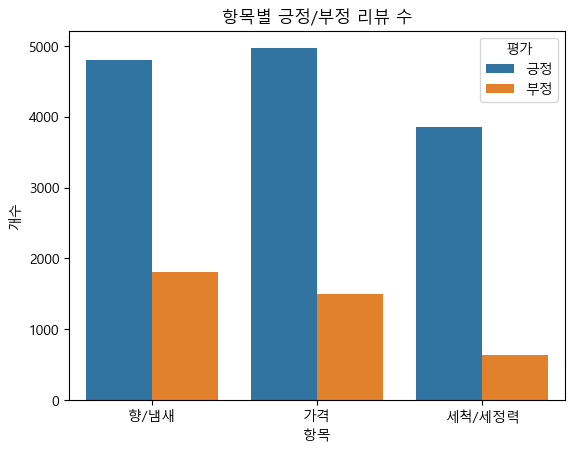

In [13]:
p.plot()

## to_do

* 일단 저희가 가장 많이 언급된 Aspect와 언급횟수중에서 긍정이 몇개이고 부정이 몇개인지 알았잖아요 이제 인덱스를 구하고 싶어요 예를 들면 {'향/냄새' : {긍정 : 4801, index : index}} 이런 식으로 해주실 수 있을까요?? 향/냄새에 관한 리뷰 -> 긍정이라고 답한 리뷰 -> 그 리뷰의 인덱스 부정도 마찬가지로 구해주세요 이해안가시면 카톡주세요!

* 저도 일단 막 짜놓은거라 class 자체를 고쳐야 할 수도 있어요 고치게 되면 고친 부분 표시만 간단하게 해주세요 

ex) 원래 Polarity가 dict 형태로 나오는데 list 형태로 나오게 고치셨다면 그 옆에 # dict -> list  이런 식으로요